## Ariane particels on long MITgcm run (CNT29)

10 particles initialized at dufferent upstream positions and depths in CNT run29 , 20 day run with output every 6 hours.

In [1]:
from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

#from MITgcmutils import rdmds

from netCDF4 import Dataset

import numpy as np

import os 

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys
#####
from matplotlib import pylab

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.cm as cm

from matplotlib import animation


In [2]:
lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
#lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 
import MetricsPythonTools as mpt

In [3]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [7]:
CGrid ='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run29/gridGlob_cropped.nc' 

CGridOut=Dataset(CGrid)
CState ='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run29/stateGlob_cropped.nc' 

for dimobj in CGridOut.variables.values():
    print dimobj



<type 'netCDF4.Variable'>
float64 YC(Y, X)
    units: degree_north
    description: Y coordinate of cell center (T-P point)
unlimited dimensions: 
current shape = (360, 360)
filling off

<type 'netCDF4.Variable'>
float64 R_low(Y, X)
    description: base of fluid in r-units
unlimited dimensions: 
current shape = (360, 360)
filling off

<type 'netCDF4.Variable'>
float64 YG(Yp1, Xp1)
    units: degree_north
    description: Y coordinate of cell corner (Vorticity point)
unlimited dimensions: 
current shape = (360, 360)
filling off

<type 'netCDF4.Variable'>
float64 rA(Y, X)
    description: r-face area at cell center
unlimited dimensions: 
current shape = (360, 360)
filling off

<type 'netCDF4.Variable'>
float64 dxV(Yp1, Xp1)
    description: x v-velocity separation
unlimited dimensions: 
current shape = (360, 360)
filling off

<type 'netCDF4.Variable'>
float64 dxF(Y, X)
    description: x cell face separation
unlimited dimensions: 
current shape = (360, 360)
filling off

<type 'netCDF4.V

In [14]:

# General input
npart = 10
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 


rc = CGridOut.variables['RC']


dxf = CGridOut.variables['dxF']
xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

rA = rout.getField(CGrid, 'rA') 

drF = CGridOut.variables['drF'] # vertical distance between faces
drC = CGridOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGrid, 'HFacC')
mask_NoC = rout.getMask(CGrid, 'HFacC')

bathy = rout.getField(CGrid,'Depth')
times = np.arange(0,nt,1)


In [35]:
f = Dataset('/ocean/kramosmu/Ariane/TracerExperiments/CNTDIFF/run29_10part_AdvPahse/ariane_trajectories_qualitative.nc','r');

#for dimobj in f.variables.values():
#    print dimobj


In [16]:
f_lont=f.variables['traj_lon']
f_latt=f.variables['traj_lat']
f_dept=f.variables['traj_depth']
f_timet=f.variables['traj_time']

f_zs=f.variables['init_z']
f_xs=f.variables['init_x']
f_ys=f.variables['init_y']
f_lont.shape

(35, 10)

Particles started at day 8.5


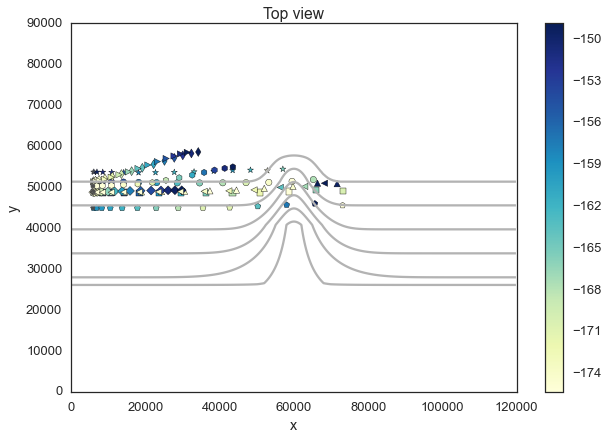

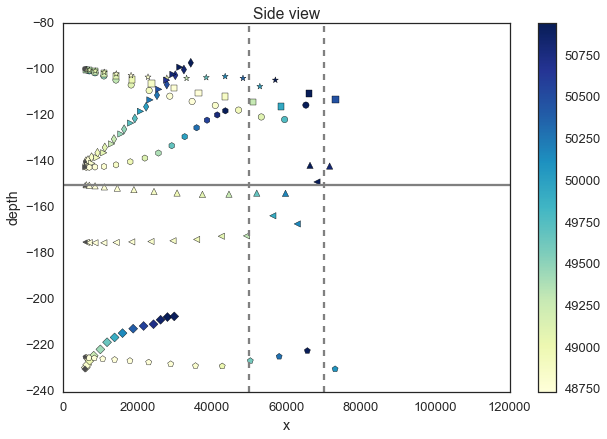

In [80]:
n = np.arange(npart)
colors = cm.rainbow(np.linspace(0, 1, len(n)))
mkr = ['o','s','*','^','D','d','p','>','h','<']
# 2D
fig, ax = plt.subplots(1,1,figsize=(10,6.6))
ax.contour(xc,yc,bathy,[150,350,550,750,950,1150],colors = '0.70')
for N,mm in zip(n,mkr):
    sca = ax.scatter(f_lont[1:15,N],f_latt[1:15,N],c=f_dept[1:15,N],marker = mm,s=40,cmap = 'YlGnBu')
    ax.scatter(f_lont[0,N],f_latt[0,N],color='0.30',marker=mm)


plt.colorbar(sca)

ax.set_xlim([0,120000])
ax.set_ylim([0,90000])
ax.set_title('Top view')
ax.set_xlabel('x')
ax.set_ylabel('y')


# 2D
fig, ax = plt.subplots(1,1,figsize=(10,6.6))
for N,mm in zip(n,mkr):
    sca=ax.scatter(f_lont[1:15,N],f_dept[1:15,N],c=f_latt[1:15,N],marker=mm,s=40,cmap = 'YlGnBu')
    ax.scatter(f_lont[0,N],f_dept[0,N],color='0.30',marker=mm)
plt.colorbar(sca)
ax.axhline(y=-150.0,color = '0.5')
ax.axvline(x=70000.0,color = '0.5', linestyle = '--')
ax.axvline(x=50000.0,color = '0.5', linestyle = '--')

ax.set_xlim([0,120000])

ax.set_title('Side view')
ax.set_xlabel('x')
ax.set_ylabel('depth')

print('Particles started at day 8.5')

In [72]:
f = Dataset('/ocean/kramosmu/Ariane/TracerExperiments/CNTDIFF/run29_10part/ariane_trajectories_qualitative.nc','r');

f_lont=f.variables['traj_lon']
f_latt=f.variables['traj_lat']
f_dept=f.variables['traj_depth']
f_timet=f.variables['traj_time']

f_zs=f.variables['init_z']
f_xs=f.variables['init_x']
f_ys=f.variables['init_y']
f_lont.shape

(69, 10)

Particles started at day 0.5


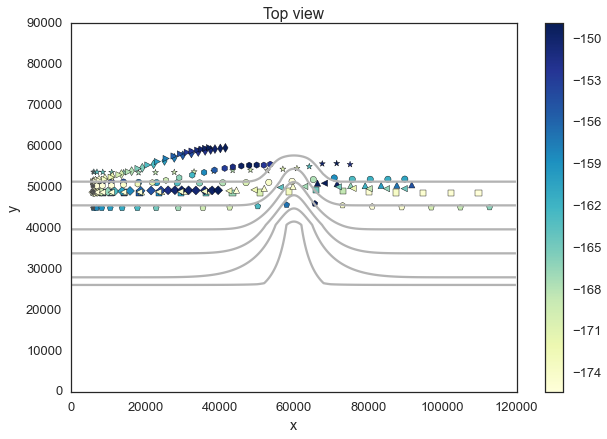

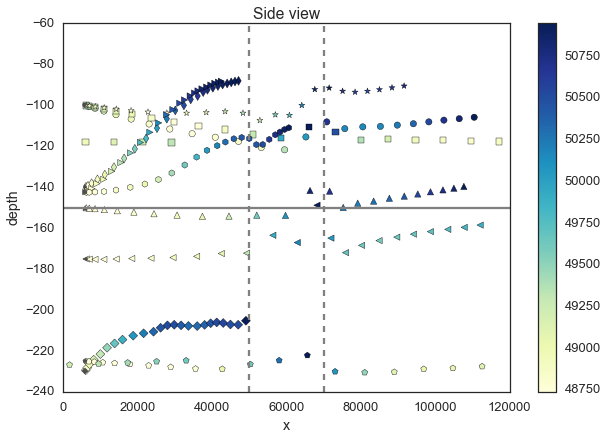

In [79]:
n = np.arange(npart)
colors = cm.rainbow(np.linspace(0, 1, len(n)))
mkr = ['o','s','*','^','D','d','p','>','h','<']
# 2D
fig, ax = plt.subplots(1,1,figsize=(10,6.6))
ax.contour(xc,yc,bathy,[150,350,550,750,950,1150],colors = '0.70')
for N,mm in zip(n,mkr):
    sca = ax.scatter(f_lont[1:20,N],f_latt[1:20,N],c=f_dept[1:20,N],marker = mm,s=40,cmap = 'YlGnBu')
    ax.scatter(f_lont[0,N],f_latt[0,N],color='0.30',marker=mm)


plt.colorbar(sca)

ax.set_xlim([0,120000])
ax.set_ylim([0,90000])
ax.set_title('Top view')
ax.set_xlabel('x')
ax.set_ylabel('y')


# 2D
fig, ax = plt.subplots(1,1,figsize=(10,6.6))
for N,mm in zip(n,mkr):
    sca=ax.scatter(f_lont[1:25,N],f_dept[1:25,N],c=f_latt[1:25,N],marker=mm,s=40,cmap = 'YlGnBu')
    ax.scatter(f_lont[0,N],f_dept[0,N],color='0.30',marker=mm)
plt.colorbar(sca)
ax.axhline(y=-150.0,color = '0.5')
ax.axvline(x=70000.0,color = '0.5', linestyle = '--')
ax.axvline(x=50000.0,color = '0.5', linestyle = '--')

ax.set_xlim([0,120000])

ax.set_title('Side view')
ax.set_xlabel('x')
ax.set_ylabel('depth')

print('Particles started at day 0.5')